In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
life_data= pd.read_csv('Life Expectancy Data.csv')

In [28]:
life_data.describe()
life_data.columns=life_data.columns.str.replace(" ","")
life_data.columns=life_data.columns.str.replace("/","")
life_data.columns=life_data.columns.str.replace("-","")
life_data.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'underfivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIVAIDS', 'GDP', 'Population', 'thinness119years',
       'thinness59years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [29]:
life_data['AdultMortality'].unique()

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

here you are checking for Nan values first, you noticed that your charting (scatter matrix)was not working so decided to look at the cleaniness 
of the data so that you would be able to see if it has to do will nan values. 

In [30]:
life_data.head
for item in life_data.columns:
    var=life_data[item].isnull().values.any()
#     print(life_data[item].unique())
    print(item +"--"+str(var))
    

Country--False
Year--False
Status--False
Lifeexpectancy--True
AdultMortality--True
infantdeaths--False
Alcohol--True
percentageexpenditure--False
HepatitisB--True
Measles--False
BMI--True
underfivedeaths--False
Polio--True
Totalexpenditure--True
Diphtheria--True
HIVAIDS--False
GDP--True
Population--True
thinness119years--True
thinness59years--True
Incomecompositionofresources--True
Schooling--True


In [31]:

place=life_data.loc[(life_data['AdultMortality'] != 'nan')& (life_data['Alcohol'] != 'nan')&(life_data['Lifeexpectancy'] != 'nan')&(life_data['HepatitisB'] != 'nan')&(life_data['BMI'] != 'nan')]

place['AdultMortality'].unique()
# life_data[life_data[Status] != 'nan']

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

In [32]:
data_sin_nan=life_data.dropna()


In [33]:
## now recheck the data for null values and missing data with same for loop
for item in place.columns:
    var=data_sin_nan[item].isnull().values.any()
    print(data_sin_nan[item].unique())
    print(item +"--"+str(var))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'Nicaragua' 'N

In [34]:
data_sin_nan.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,underfivedeaths,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


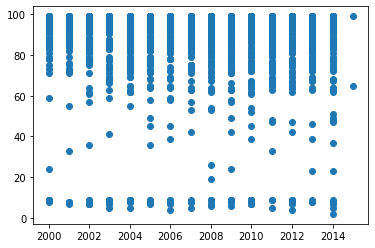

In [35]:
plt.scatter(data_sin_nan['Year'],data_sin_nan['Diphtheria'])
    

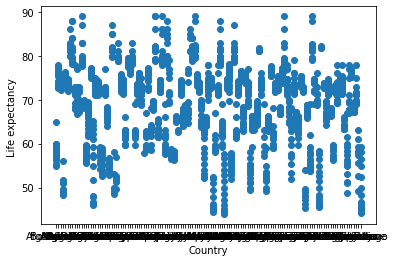

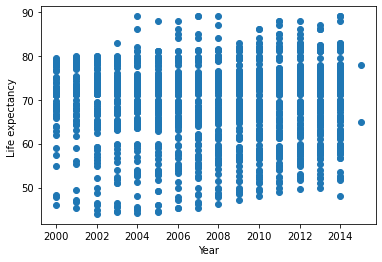

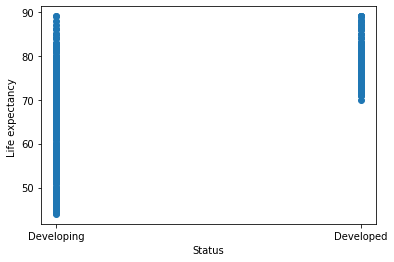

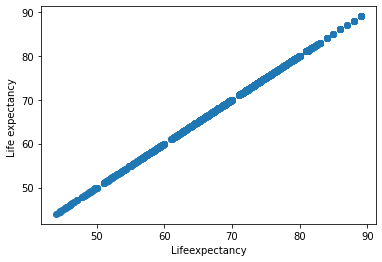

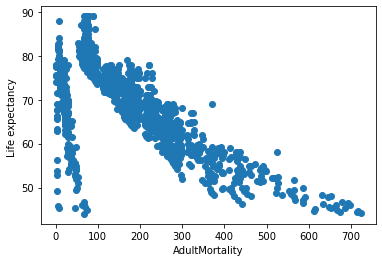

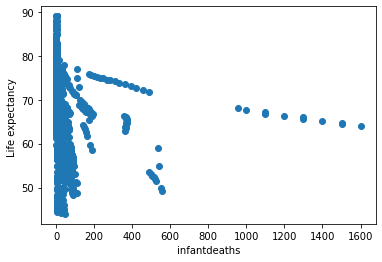

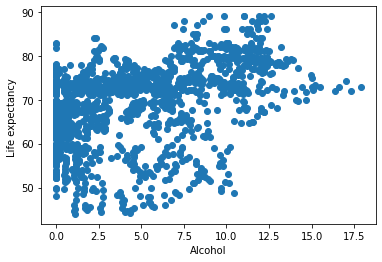

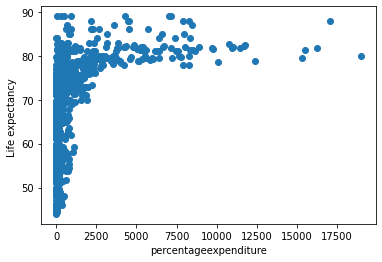

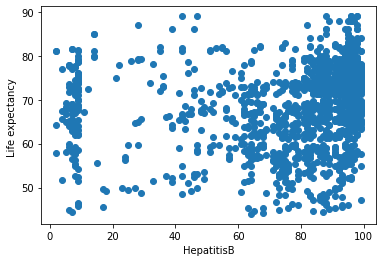

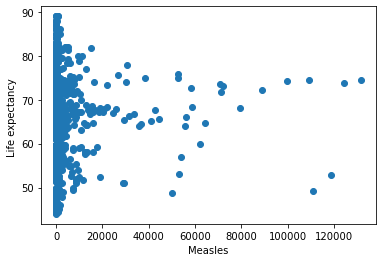

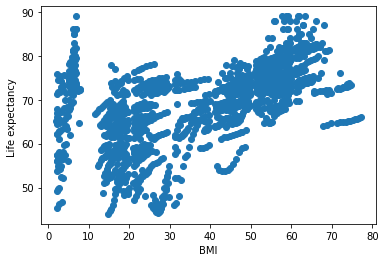

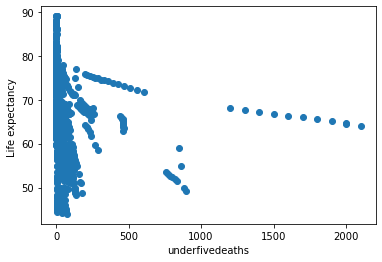

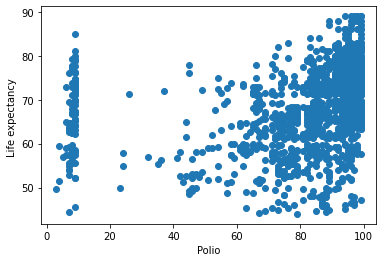

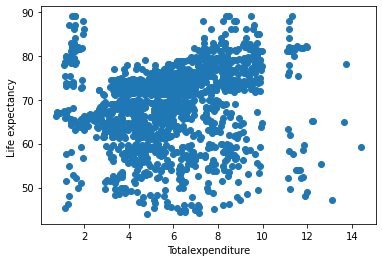

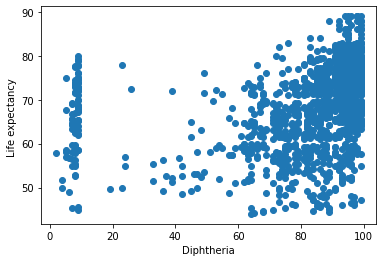

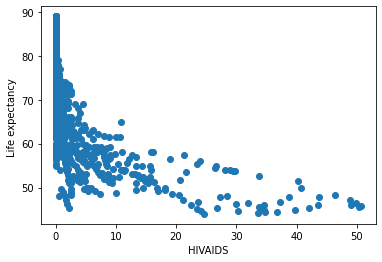

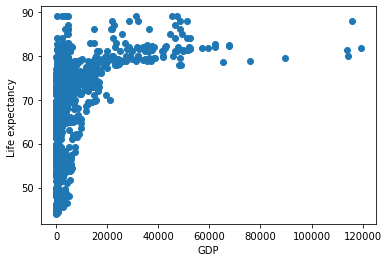

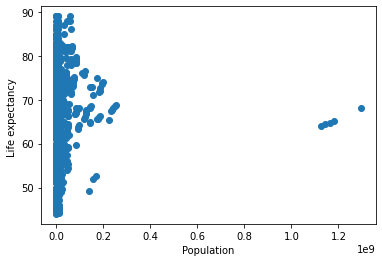

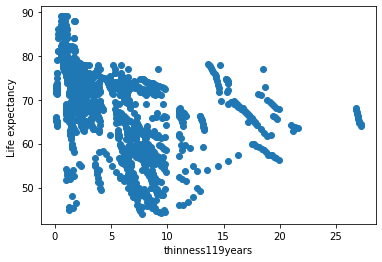

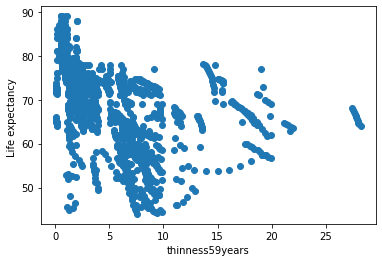

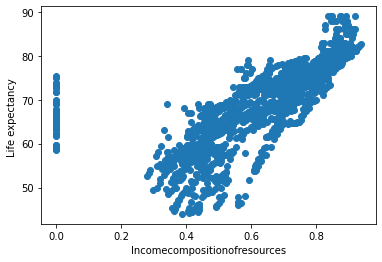

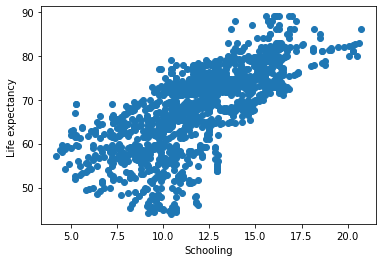

In [36]:
#clean this up so that you are only picking the  continues variables
#this is good for now just grab the plots that you needd
col_name=data_sin_nan.columns
for pos, var1 in enumerate(col_name):
    
    plt.scatter(data_sin_nan[var1],data_sin_nan['Lifeexpectancy'])
    plt.xlabel(var1)
    plt.ylabel('Life expectancy ')
    plt.show()

In [37]:
cat_only=data_sin_nan.loc[:,data_sin_nan.columns.difference (['Country','Year','Status'])]
cat_only

,AdultMortality,Alcohol,BMI,Diphtheria,GDP,HIVAIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Totalexpenditure,infantdeaths,percentageexpenditure,thinness119years,thinness59years,underfivedeaths
0,263.0,0.01,19.1,65.0,584.259210,0.1,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,8.16,62,71.279624,17.2,17.3,83
1,271.0,0.01,18.6,62.0,612.696514,0.1,62.0,0.476,59.9,492,58.0,327582.0,10.0,8.18,64,73.523582,17.5,17.5,86
2,268.0,0.01,18.1,64.0,631.744976,0.1,64.0,0.470,59.9,430,62.0,31731688.0,9.9,8.13,66,73.219243,17.7,17.7,89
3,272.0,0.01,17.6,67.0,669.959000,0.1,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,8.52,69,78.184215,17.9,18.0,93
4,275.0,0.01,17.2,68.0,63.537231,0.1,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,7.87,71,7.097109,18.2,18.2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,4.36,27.1,65.0,454.366654,33.6,68.0,0.407,44.3,31,67.0,12777511.0,9.2,7.13,27,0.000000,9.4,9.4,42
2934,715.0,4.06,26.7,68.0,453.351155,36.7,7.0,0.418,44.5,998,7.0,12633897.0,9.5,6.52,26,0.000000,9.8,9.9,41
2935,73.0,4.43,26.3,71.0,57.348340,39.8,73.0,0.427,44.8,304,73.0,125525.0,10.0,6.53,25,0.000000,1.2,1.3,40
2936,686.0,1.72,25.9,75.0,548.587312,42.1,76.0,0.427,45.3,529,76.0,12366165.0,9.8,6.16,25,0.000000,1.6,1.7,39


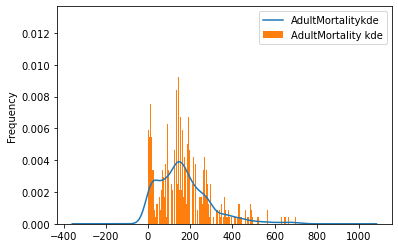

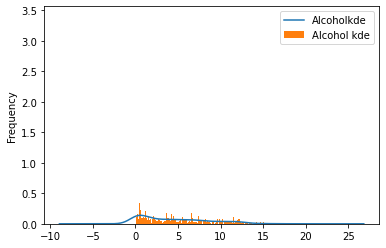

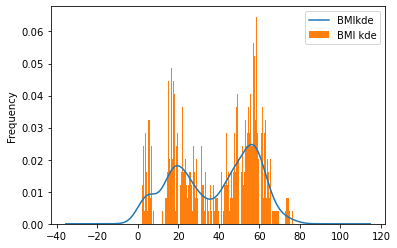

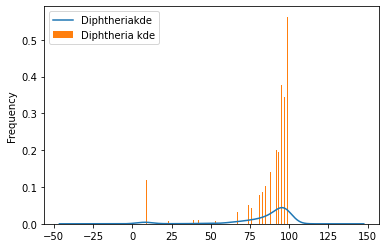

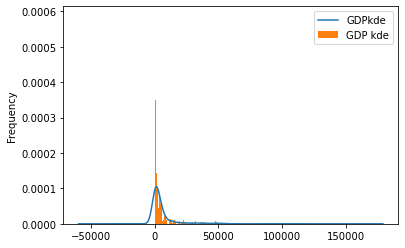

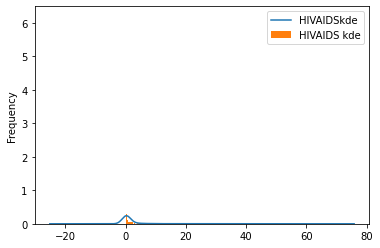

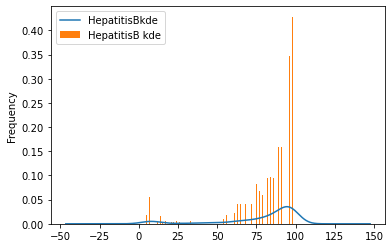

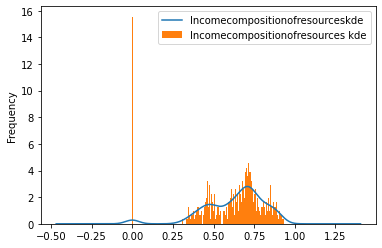

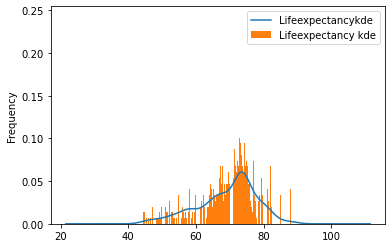

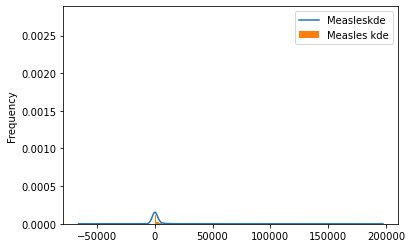

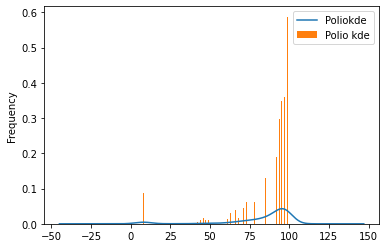

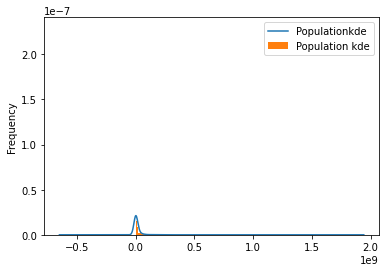

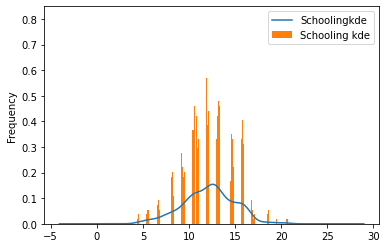

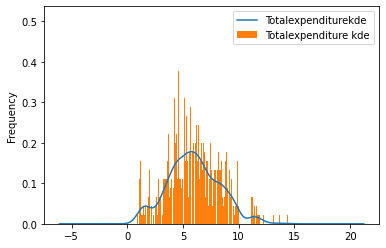

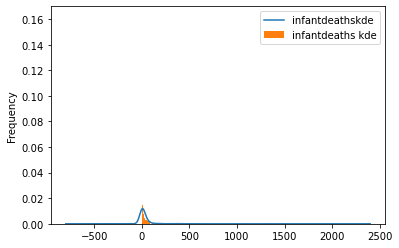

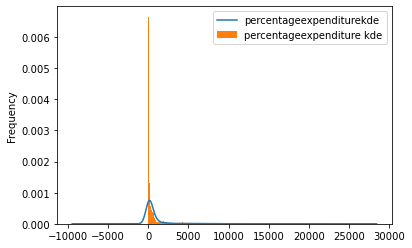

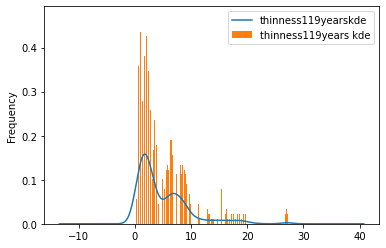

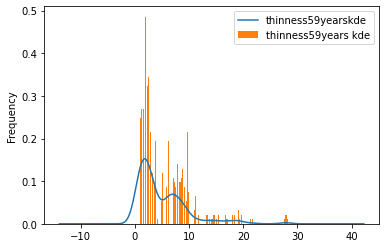

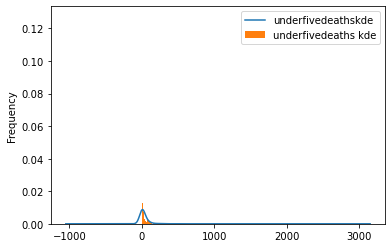

In [38]:
for col in cat_only[1:]:
    cat_only[col].plot.kde(label=col+ 'kde')
    cat_only[col].plot.hist(density=True,label =col+' kde',bins=500)
    plt.legend()
    plt.show()

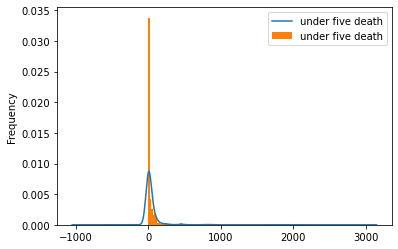

In [40]:
cat_only['underfivedeaths'].plot.kde(label='under five death')
cat_only['underfivedeaths'].plot.hist(density=True,label ='under five death', bins=100)
plt.legend()
plt.show()

<ipython-input-49-2b34fea33643>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  cat_only.hist(ax= ax, bins=75);


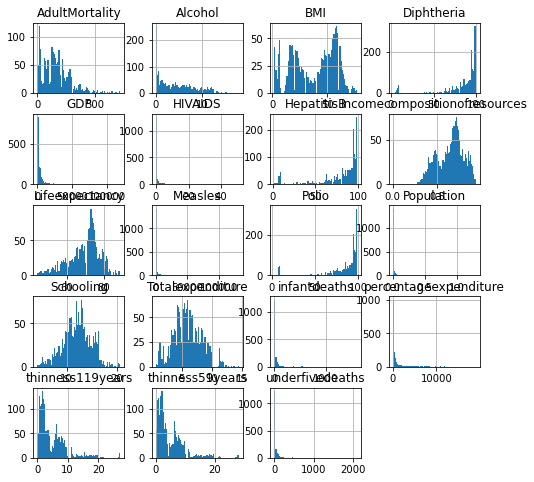

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()

cat_only.hist(ax= ax, bins=75);

In [44]:
cat_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AdultMortality                1649 non-null   float64
 1   Alcohol                       1649 non-null   float64
 2   BMI                           1649 non-null   float64
 3   Diphtheria                    1649 non-null   float64
 4   GDP                           1649 non-null   float64
 5   HIVAIDS                       1649 non-null   float64
 6   HepatitisB                    1649 non-null   float64
 7   Incomecompositionofresources  1649 non-null   float64
 8   Lifeexpectancy                1649 non-null   float64
 9   Measles                       1649 non-null   int64  
 10  Polio                         1649 non-null   float64
 11  Population                    1649 non-null   float64
 12  Schooling                     1649 non-null   float64
 13  Tot

In [46]:
cat_only.corr()

,AdultMortality,Alcohol,BMI,Diphtheria,GDP,HIVAIDS,HepatitisB,Incomecompositionofresources,Lifeexpectancy,Measles,Polio,Population,Schooling,Totalexpenditure,infantdeaths,percentageexpenditure,thinness119years,thinness59years,underfivedeaths
AdultMortality,1.000000,-0.175535,-0.351542,-0.191429,-0.255035,0.550691,-0.105225,-0.442203,-0.702523,-0.003967,-0.199853,-0.015012,-0.421171,-0.085227,0.042450,-0.237610,0.272230,0.286723,0.060365
Alcohol,-0.175535,1.000000,0.353396,0.242951,0.443433,-0.027113,0.109889,0.561074,0.402718,-0.050110,0.240315,-0.028880,0.616975,0.214885,-0.106217,0.417047,-0.403755,-0.386208,-0.101082
BMI,-0.351542,0.353396,1.000000,0.176295,0.266114,-0.210897,0.143302,0.510505,0.542042,-0.153245,0.186268,-0.081416,0.554844,0.189469,-0.234425,0.242738,-0.547018,-0.554094,-0.242137
Diphtheria,-0.191429,0.242951,0.176295,1.000000,0.158438,-0.117601,0.588990,0.343262,0.341331,-0.058606,0.609245,-0.039898,0.350398,0.129915,-0.161871,0.134813,-0.187242,-0.180952,-0.178448
GDP,-0.255035,0.443433,0.266114,0.158438,1.000000,-0.108081,0.041850,0.446856,0.441322,-0.064768,0.156809,-0.020369,0.467947,0.180373,-0.098092,0.959299,-0.277498,-0.277959,-0.100331
HIVAIDS,0.550691,-0.027113,-0.210897,-0.117601,-0.108081,1.000000,-0.094802,-0.248590,-0.592236,-0.003522,-0.107885,-0.027801,-0.211840,0.043101,0.007712,-0.095085,0.172592,0.183147,0.019476
HepatitisB,-0.105225,0.109889,0.143302,0.588990,0.041850,-0.094802,1.000000,0.184921,0.199935,-0.124800,0.463331,-0.129723,0.215182,0.113327,-0.231769,0.016760,-0.129406,-0.133251,-0.240766
Incomecompositionofresources,-0.442203,0.561074,0.510505,0.343262,0.446856,-0.248590,0.184921,1.000000,0.721083,-0.058277,0.314682,-0.008132,0.784741,0.183653,-0.134754,0.402170,-0.453679,-0.438484,-0.148097
Lifeexpectancy,-0.702523,0.402718,0.542042,0.341331,0.441322,-0.592236,0.199935,0.721083,1.000000,-0.068881,0.327294,-0.022305,0.727630,0.174718,-0.169074,0.409631,-0.457838,-0.457508,-0.192265
Measles,-0.003967,-0.050110,-0.153245,-0.058606,-0.064768,-0.003522,-0.124800,-0.058277,-0.068881,1.000000,-0.057850,0.321946,-0.115660,-0.113583,0.532680,-0.063071,0.180642,0.174946,0.517506


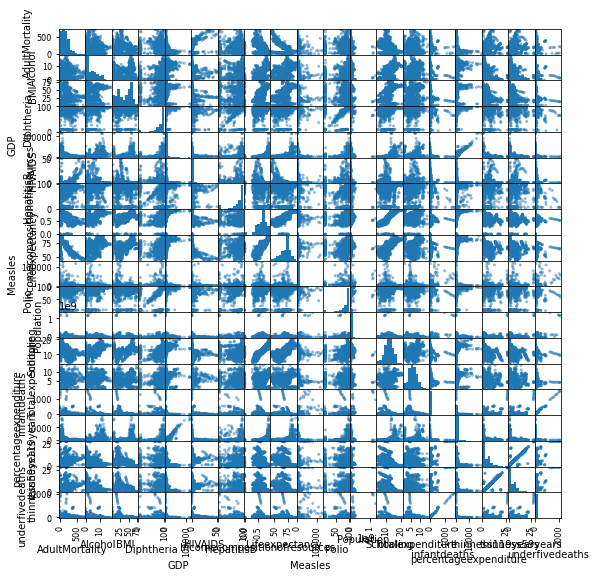

In [50]:
pd.plotting.scatter_matrix(cat_only, figsize=[9,9]);
plt.show()

In [51]:
f ='Lifeexpectancy~AdultMortality+infantdeaths+Alcohol+percentageexpenditure+HepatitisB+Measles+BMI+underfivedeaths+Polio+Totalexpenditure+Diphtheria+HIVAIDS+GDP+Population+thinness119years+thinness59years+Incomecompositionofresources+Schooling'
model = ols(formula=f, data=cat_only).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Lifeexpectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     457.4
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:21:23   Log-Likelihood:                -4440.6
No. Observations:                1649   AIC:                             8919.
Df Residuals:                    1630   BIC:                             9022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       53.2816      0.736     72.412      0.000      51.838      54.725
AdultMortality                  -0.0169      0.001    -17.828      0.000      -0.019      -0.015
infantdeaths                     0.0937      0.011      8.776      0.000       0.073       0.115
Alcohol                         -0.0543      0.031     -1.776      0.076      -0.114       0.006
percentageexpenditure            0.0004      0.000      2.093      0.037    2.37e-05       0.001
HepatitisB                      -0.0056      0.004     -1.256      0.209      -0.014       0.003
Measles                      -8.617e-06   1.08e-05     -0.797      0.425   -2.98e-05    1.26e-05
BMI                              0.0335      0.006      5.573      0.000       0.022       0.045
underfivedeaths                 -0.0705      0.008     -9.119      0.000      -0.086      -0.055
Polio                            0.0078      0.005      1.518      0.129      -0.002       0.018
Totalexpenditure                 0.0798      0.041      1.958      0.050      -0.000       0.160
Diphtheria                       0.0144      0.006      2.423      0.015       0.003       0.026
HIVAIDS                         -0.4383      0.018    -24.519      0.000      -0.473      -0.403
GDP                           1.383e-05   2.84e-05      0.487      0.626   -4.18e-05    6.95e-05
Population                   -6.917e-10   1.75e-09     -0.395      0.693   -4.13e-09    2.75e-09
thinness119years                -0.0087      0.053     -0.163      0.870      -0.113       0.095
thinness59years                 -0.0512      0.052     -0.977      0.329      -0.154       0.052
Incomecompositionofresources     9.8241      0.834     11.780      0.000       8.188      11.460
Schooling                        0.8783      0.059     14.789      0.000       0.762       0.995
==============================================================================
Omnibus:                       38.172   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.110
Skew:                          -0.145   Prob(JB):                     3.62e-16
Kurtosis:                       3.975   Cond. No.                     7.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""